# Regression analysis - FIFA player ratings explained

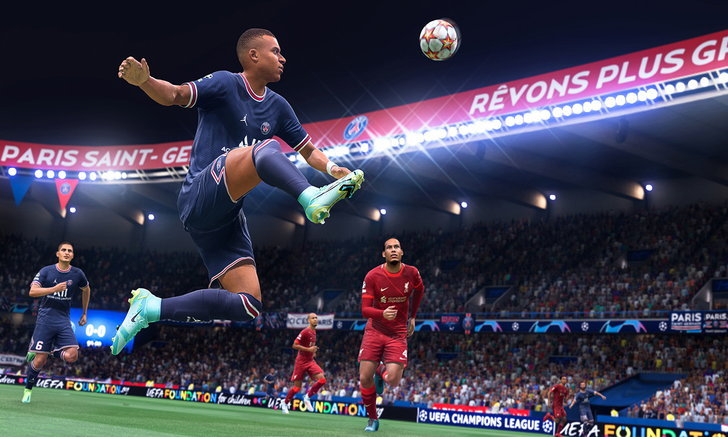

## Introduction

FIFA, the international association for association football, is also the name of a popular series of football video games featuring real life players. A new version is released every year, with the in-game statistics newly updated to reflect the real life numbers of the latest professional season. 

Each player is given an overall player rating out of 100 based on their performance of the latest season. In FIFA 21, Lionel Messi is rated 94. Players are also given ratings for different sub-ratings such as pace, shooting, passing, etc. Going back to the Messi example,
Messi was given 85 pace, 92 shooting, and 91 passing. The card example below makes it clear:

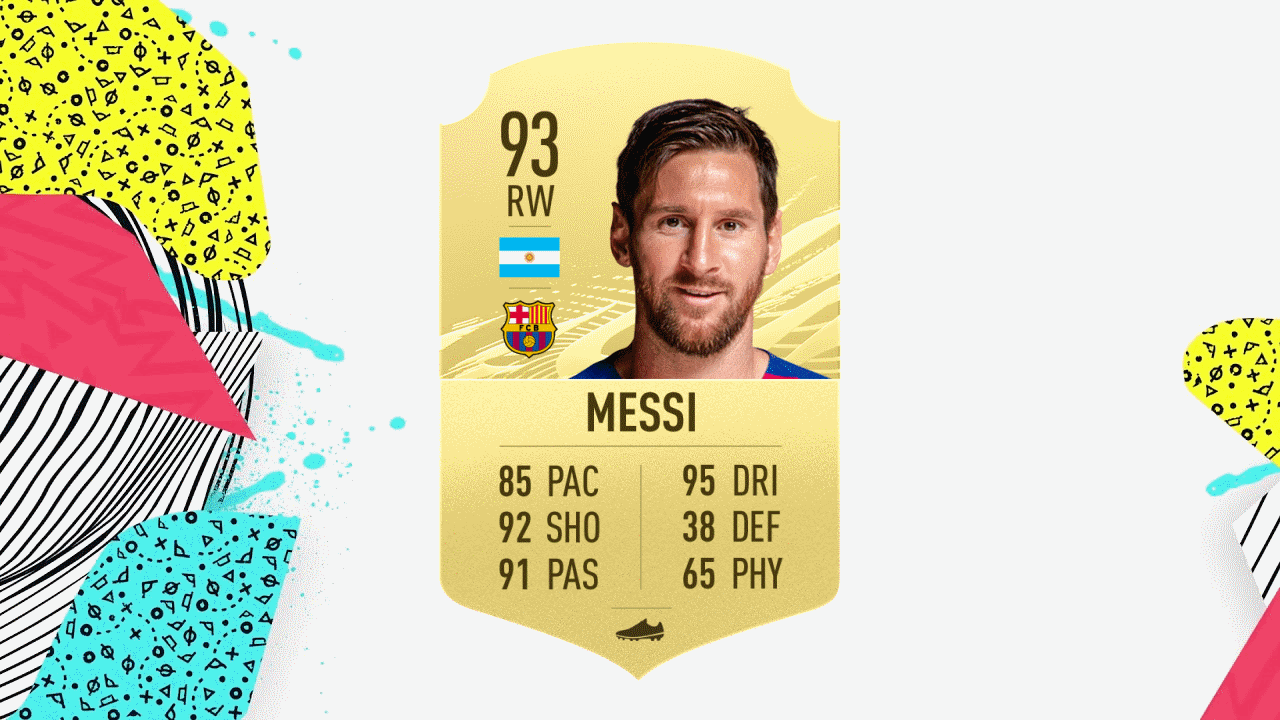

These sub-ratings are shaped by more specific, detailed attribute ratings that are not displayed on a player card. Such family of attributes consists of around 30 members and includes sprint speed, crossing, finishing, stamina, vision, positioning, and many more.

Now as attention-drawing and discussion-inducing these in-game figures are, not much is known about the methodlogy behind the evaluation and calculation process. An 2019 article (https://www.goal.com/en-ae/news/fifa-player-ratings-explained-how-are-the-card-number-stats/1hszd2fgr7wgf1n2b2yjdpgynu) based on an interview with the head of a team that makes these ratings offers a glimpse of what goes on behind the curtain.

While undertandably the article still leaves lots of questions unanswered, the part that explains how the detailed attribute ratings make up an overall rating of a player of a particular playing position is interesting and worth further looking into. As shown in the example a centre-back (CB) player, 11 of 30+ detailed attribute ratings are taken into account in varying degrees when calculating the overall player rating.

As an avid football fan myself I was intrigued to figure out the different formulas for different playing positions that are not available through googling. So here it is, this is a personal project to answer the question, "How are the attribute ratings related to the overall player rating in FIFA?" A perfect research topic for regression analysis, this project can hopefully shed some light into how the game makers and experts evaluate  different footballers.

## The Dataset & Data Preprocessing

The dataset can be found here: https://www.kaggle.com/stefanoleone992/fifa-21-complete-player-dataset?select=players_21.csv

The dataset consists of 106 columns and over 18,000 rows. It contains every bit of information available in FIFA 21 for each player.

In [1]:
# loading the dataset
import pandas as pd
fifa = pd.read_csv("/Users/Jun/Desktop/players_21.csv")
fifa.head(25)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,29,1991-06-28,181,70,Belgium,Manchester City,...,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3
6,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé Lottin,21,1998-12-20,178,73,France,Paris Saint-Germain,...,67+3,63+3,63+3,63+3,67+3,63+3,55+3,55+3,55+3,63+3
7,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,28,1992-04-30,187,85,Germany,FC Barcelona,...,33+3,41+3,41+3,41+3,33+3,31+3,33+3,33+3,33+3,31+3
8,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,28,1991-07-08,193,92,Netherlands,Liverpool,...,80+3,85+3,85+3,85+3,80+3,82+3,89+2,89+2,89+2,82+3
9,212831,https://sofifa.com/player/212831/alisson-ramse...,Alisson,Alisson Ramsés Becker,27,1992-10-02,191,91,Brazil,Liverpool,...,31+3,35+3,35+3,35+3,31+3,30+3,30+3,30+3,30+3,30+3


Clearly not all 106 columns would be useful and therefore the first step is to drop unnecessary columns. 

Considering the research question and the article above, the columns to keep are the following: short_name, age, overall, international_reputation, attacking_crossing, ..., goalkeeping_reflexes.

In [2]:
personal = fifa.loc[:, ["short_name", "player_positions", "age", "overall", "international_reputation"]]
fifa = fifa.iloc[:, 46:80]
fifa = pd.concat([personal, fifa], axis = 1, join = "inner")
fifa.drop("defending_marking", axis = 1, inplace = True)
fifa.head(20)

,short_name,player_positions,age,overall,international_reputation,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,"RW, ST, CF",33,93,5,85,95,70,91,88,...,95,75,96,35,24,6,11,15,14,8
1,Cristiano Ronaldo,"ST, LW",35,92,5,84,95,90,82,86,...,82,84,95,32,24,7,11,15,14,11
2,J. Oblak,GK,27,91,3,13,11,15,43,13,...,65,11,68,12,18,87,92,78,90,90
3,R. Lewandowski,ST,31,91,4,71,94,85,84,89,...,79,88,88,42,19,15,6,12,8,10
4,Neymar Jr,"LW, CAM",28,91,5,85,87,62,87,87,...,90,92,93,30,29,9,9,15,15,11
5,K. De Bruyne,"CAM, CM",29,91,4,94,82,55,94,82,...,94,84,91,65,53,15,13,5,10,13
6,K. Mbappé,"ST, LW, RW",21,90,3,78,91,73,83,83,...,80,70,84,34,32,13,5,7,11,6
7,M. ter Stegen,GK,28,90,3,18,14,11,61,14,...,70,25,70,13,10,88,85,88,88,90
8,V. van Dijk,CB,28,90,3,53,52,87,79,45,...,65,62,90,93,86,13,10,13,11,11
9,Alisson,GK,27,90,3,17,13,19,45,20,...,66,23,65,19,16,86,88,85,91,89


The columns starting from "attacking_crossing" to the end are the 30+ specific attributes that can shape the overall player rating. The below image of a particular player analysis table should make things clear:

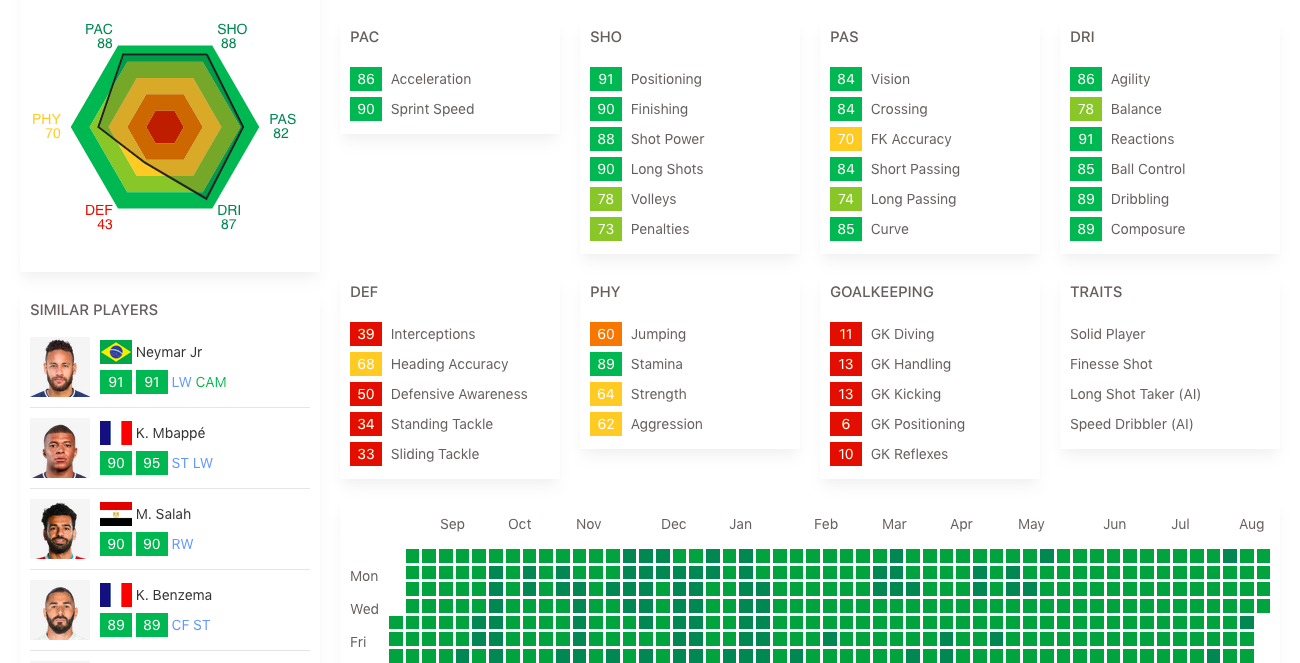

Next - remove duplicates and rows with missing values.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(fifa.isnull(), cbar = False) #
# no missing values

In [4]:
sum(fifa.duplicated()) # no duplicates

0

No duplicates nor missing values found. Lastly, the 'player_positions' column gives all possible playing positions for each player. In this case only the best playing positions from each player are desired, and thankfully by default they all appear at the very front.

In [5]:
fifa["player_positions"] = fifa["player_positions"].str.split(",").str[0]
fifa.rename({"player_positions": "best_position"}, axis = 1, inplace = True)
fifa.head(20)

,short_name,best_position,age,overall,international_reputation,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,RW,33,93,5,85,95,70,91,88,...,95,75,96,35,24,6,11,15,14,8
1,Cristiano Ronaldo,ST,35,92,5,84,95,90,82,86,...,82,84,95,32,24,7,11,15,14,11
2,J. Oblak,GK,27,91,3,13,11,15,43,13,...,65,11,68,12,18,87,92,78,90,90
3,R. Lewandowski,ST,31,91,4,71,94,85,84,89,...,79,88,88,42,19,15,6,12,8,10
4,Neymar Jr,LW,28,91,5,85,87,62,87,87,...,90,92,93,30,29,9,9,15,15,11
5,K. De Bruyne,CAM,29,91,4,94,82,55,94,82,...,94,84,91,65,53,15,13,5,10,13
6,K. Mbappé,ST,21,90,3,78,91,73,83,83,...,80,70,84,34,32,13,5,7,11,6
7,M. ter Stegen,GK,28,90,3,18,14,11,61,14,...,70,25,70,13,10,88,85,88,88,90
8,V. van Dijk,CB,28,90,3,53,52,87,79,45,...,65,62,90,93,86,13,10,13,11,11
9,Alisson,GK,27,90,3,17,13,19,45,20,...,66,23,65,19,16,86,88,85,91,89


## Fitting a Regression Model

Now that the data are ready, regression models can now be trained. As an example, here's how to fit a linear regression model for strikers.

In [6]:
strikers = fifa[fifa["best_position"] == "ST"]
strikers.head(10)

,short_name,best_position,age,overall,international_reputation,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
1,Cristiano Ronaldo,ST,35,92,5,84,95,90,82,86,...,82,84,95,32,24,7,11,15,14,11
3,R. Lewandowski,ST,31,91,4,71,94,85,84,89,...,79,88,88,42,19,15,6,12,8,10
6,K. Mbappé,ST,21,90,3,78,91,73,83,83,...,80,70,84,34,32,13,5,7,11,6
13,S. Agüero,ST,32,89,4,70,94,78,83,86,...,83,75,91,29,24,13,15,6,11,14
21,H. Kane,ST,26,88,3,75,94,85,81,85,...,83,90,91,36,38,8,10,11,14,11
37,L. Suárez,ST,33,87,5,80,92,84,83,90,...,84,83,85,45,38,27,25,31,33,37
41,P. Aubameyang,ST,31,87,3,76,91,75,77,84,...,77,78,88,29,36,6,9,15,9,9
43,C. Immobile,ST,30,87,3,55,93,81,80,85,...,71,88,86,33,32,6,8,15,12,6
45,A. Griezmann,ST,29,87,4,83,88,83,84,87,...,85,86,89,54,49,14,8,14,13,14
61,J. Vardy,ST,33,86,3,68,92,79,69,82,...,73,84,87,50,53,15,14,7,15,11


Because the goal is to find out how different attributes and reputation level can shape the overall rating for strikers, the dependent variable is "overall" and the independent variables are all the columns to its right.

In [7]:
Y = strikers["overall"]
X = strikers.iloc[:, 4:]

In [8]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
model.summary()

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.286e+04
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:45:54   Log-Likelihood:                -883.17
No. Observations:                2645   AIC:                             1836.
Df Residuals:                    2610   BIC:                             2042.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.2850      0.107     -2.671      0.008      -0.494      -0.076
international_reputation       0.2128      0.020     10.880      0.000       0.174       0.251
attacking_crossing             0.0002      0.001      0.175      0.861      -0.002       0.002
attacking_finishing            0.1882      0.002     87.844      0.000       0.184       0.192
attacking_heading_accuracy     0.0964      0.001     71.271      0.000       0.094       0.099
attacking_short_passing        0.0506      0.002     29.866      0.000       0.047       0.054
attacking_volleys              0.0192      0.001     15.433      0.000       0.017       0.022
skill_dribbling                0.0663      0.002     33.612      0.000       0.062       0.070
skill_curve                  7.53e-05      0.001      0.078      0.938      -0.002       0.002
skill_fk_accuracy             -0.0020      0.001     -2.600      0.009      -0.004      -0.000
skill_long_passing            -0.0011      0.001     -1.001      0.317      -0.003       0.001
skill_ball_control             0.1024      0.002     44.748      0.000       0.098       0.107
movement_acceleration          0.0404      0.002     26.543      0.000       0.037       0.043
movement_sprint_speed          0.0491      0.001     35.128      0.000       0.046       0.052
movement_agility              -0.0006      0.001     -0.515      0.606      -0.003       0.002
movement_reactions             0.0849      0.002     50.507      0.000       0.082       0.088
movement_balance               0.0007      0.001      0.748      0.454      -0.001       0.002
power_shot_power               0.0974      0.002     59.392      0.000       0.094       0.101
power_jumping                 -0.0006      0.001     -0.733      0.463      -0.002       0.001
power_stamina                  0.0014      0.001      1.731      0.084      -0.000       0.003
power_strength                 0.0491      0.001     52.824      0.000       0.047       0.051
power_long_shots               0.0307      0.002     19.599      0.000       0.028       0.034
mentality_aggression          -0.0009      0.001     -1.524      0.128      -0.002       0.000
mentality_interceptions        0.0015      0.001      1.607      0.108      -0.000       0.003
mentality_positioning          0.1299      0.002     64.597      0.000       0.126       0.134
mentality_vision              -0.0002      0.001     -0.166      0.869      -0.003       0.002
mentality_penalties           -0.0004      0.001     -0.323      0.747      -0.003       0.002
mentality_composure           -0.0009      0.001     -0.656      0.512      -0.004       0.002
defending_standing_tackle      0.0007      0.001      0.526      0.599      -0.002       0.003
defending_sliding_tackle      -0.0006      

Above is a model with all independent variables included. A very well fitting one, yet clearly there are many unnecessary variables. A common variable selection method is backward elimination, and the following code demonstrates that:

In [9]:
# Backward Elimination

import statsmodels.api as sm
cols = list(X.columns)

while len(cols) > 0:
    X = X[cols]
    model = sm.OLS(Y, X).fit()
    pvals = pd.Series(model.pvalues.values[1:], index = cols[1:])
    fmaxp = pvals.idxmax()
    if (pvals[fmaxp] >= 0.05):
        cols.remove(fmaxp)
    else:
        break

print(cols) 

['const', 'international_reputation', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_fk_accuracy', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_reactions', 'power_shot_power', 'power_strength', 'power_long_shots', 'mentality_positioning']


Now fitting a new model with the above selected independent variables,

In [10]:
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 7.463e+04
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:45:54   Log-Likelihood:                -889.87
No. Observations:                2645   AIC:                             1812.
Df Residuals:                    2629   BIC:                             1906.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.2886      0.082     -3.527      0.000      -0.449      -0.128
international_reputation       0.2077      0.019     10.945      0.000       0.170       0.245
attacking_finishing            0.1881      0.002     91.277      0.000       0.184       0.192
attacking_heading_accuracy     0.0960      0.001     77.239      0.000       0.094       0.098
attacking_short_passing        0.0503      0.001     33.728      0.000       0.047       0.053
attacking_volleys              0.0190      0.001     15.806      0.000       0.017       0.021
skill_dribbling                0.0657      0.002     34.141      0.000       0.062       0.069
skill_fk_accuracy             -0.0022      0.001     -3.218      0.001      -0.003      -0.001
skill_ball_control             0.1027      0.002     45.226      0.000       0.098       0.107
movement_acceleration          0.0405      0.001     28.466      0.000       0.038       0.043
movement_sprint_speed          0.0492      0.001     35.808      0.000       0.047       0.052
movement_reactions             0.0852      0.002     52.100      0.000       0.082       0.088
power_shot_power               0.0969      0.002     60.641      0.000       0.094       0.100
power_strength                 0.0488      0.001     62.321      0.000       0.047       0.050
power_long_shots               0.0307      0.002     19.946      0.000       0.028       0.034
mentality_positioning          0.1297      0.002     67.008      0.000       0.126       0.133
==============================================================================
Omnibus:                       69.374   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.054
Skew:                           0.333   Prob(JB):                     5.60e-19
Kurtosis:                       3.565   Cond. No.                     2.96e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Validation

The above new model fits very well to the training set and is without any unnecessary variable (all p-values very close to 0). The note does accuse the model of multicollinearity issue, but none of the following VIF figures is above 10 (which is the usual safety threshold).

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
pd.Series([vif(X.values, i) for i in range(X.shape[1])], index=X.columns)

const                         153.408520
international_reputation        1.335494
attacking_finishing             5.542905
attacking_heading_accuracy      3.144938
attacking_short_passing         4.050002
attacking_volleys               3.781632
skill_dribbling                 5.898449
skill_fk_accuracy               1.857198
skill_ball_control              7.590333
movement_acceleration           5.625195
movement_sprint_speed           4.871136
movement_reactions              4.835978
power_shot_power                4.682161
power_strength                  1.971777
power_long_shots                3.712113
mentality_positioning           7.005492
dtype: float64

An essential model validity diagnosis plot is the residual v. fitted values plot. While the model is well-fitting, the plot suggests that it is heteroscedastic.

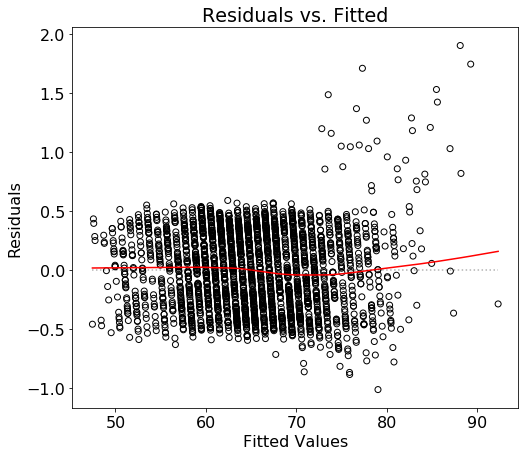

In [12]:
from statsmodels.nonparametric.smoothers_lowess import lowess
residuals = model.resid
fitted = model.fittedvalues
smoothed = lowess(residuals, fitted)

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

plt.show()

Heteroskedascity is problematic when it comes to inference because some of the standard errors of the coefficients may become unreliable, which in turn can render the associated p-values and CIs unreliable.

While common remedies involve the manipulation of variables, there is a way out without doing so, and that is the use of heteroscedascity-robust standard errors. Under this case the standard errors will remain reliable even when the model is heteroscedastic, and this means the inference results can be relied upon.

In [13]:
model = sm.OLS(Y, X).fit(cov_type = "HC3")
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 6.207e+04
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:45:56   Log-Likelihood:                -889.87
No. Observations:                2645   AIC:                             1812.
Df Residuals:                    2629   BIC:                             1906.
Df Model:                          15                                         
Covariance Type:                  HC3                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.2886      0.093     -3.117      0.002      -0.470      -0.107
international_reputation       0.2077      0.033      6.293      0.000       0.143       0.272
attacking_finishing            0.1881      0.002     92.419      0.000       0.184       0.192
attacking_heading_accuracy     0.0960      0.001     73.776      0.000       0.093       0.099
attacking_short_passing        0.0503      0.001     35.845      0.000       0.048       0.053
attacking_volleys              0.0190      0.001     16.583      0.000       0.017       0.021
skill_dribbling                0.0657      0.002     34.487      0.000       0.062       0.069
skill_fk_accuracy             -0.0022      0.001     -3.134      0.002      -0.004      -0.001
skill_ball_control             0.1027      0.002     47.907      0.000       0.098       0.107
movement_acceleration          0.0405      0.001     28.016      0.000       0.038       0.043
movement_sprint_speed          0.0492      0.001     35.544      0.000       0.047       0.052
movement_reactions             0.0852      0.002     54.312      0.000       0.082       0.088
power_shot_power               0.0969      0.002     62.310      0.000       0.094       0.100
power_strength                 0.0488      0.001     64.173      0.000       0.047       0.050
power_long_shots               0.0307      0.002     19.183      0.000       0.028       0.034
mentality_positioning          0.1297      0.002     69.314      0.000       0.126       0.133
==============================================================================
Omnibus:                       69.374   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.054
Skew:                           0.333   Prob(JB):                     5.60e-19
Kurtosis:                       3.565   Cond. No.                     2.96e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 2.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model is good to go!

According to the table above,

Predicted Overall, Striker = -0.2886 + 0.2077 international_reputation + 0.1881 attacking_finishing + 0.0960 attacking_heading_accuracy + 0.0503 attacking_short_passing + 0.0190 attacking_volleys + 0.0657 skill_dribbling - 0.0022 skill_fk_accuracy + 0.1027 skill_ball_control + 0.0405 movement_accelearation + 0.0492 movement_sprint_speed + 0.0852 movement_reactions + 0.0969 power_shot_power + 0.0488 power_strength + 0.0307 power_long_shots + 0.1297 mentality_postitioning

The top 5 most important attribute variables are: attacking_finishing, mentality_postitioning, skill_ball_control, power_shot_power ≈ attacking_heading_accuracy, in that order.

## Model Evaluation

While it is conventional to prepare a test set by splitting the original dataset, I chose not to but instead test out the model for the previous version, FIFA 20. Below is the result:

In [14]:
fifa20 = pd.read_csv("/Users/Jun/Desktop/players_20.csv")

personal20 = fifa20.loc[:, ["short_name", "player_positions", "age", "overall", "international_reputation"]]
fifa20 = fifa20.iloc[:, 46:80]
fifa20 = pd.concat([personal20, fifa20], axis = 1, join = "inner")
fifa20.drop("defending_marking", axis = 1, inplace = True)

fifa20["player_positions"] = fifa20["player_positions"].str.split(",").str[0]
fifa20.rename({"player_positions": "best_position"}, axis = 1, inplace = True)

strikers20 = fifa20[fifa20["best_position"] == "ST"]

strikers20 = sm.add_constant(strikers20)
Y20 = strikers20["overall"]
X20 = strikers20.loc[:, X.columns]

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, Y)
regressor.score(X20, Y20)

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.977230246444714

So the test set score for the linear model is 0.977, which is an excellent result. This means that roughly 98% of total variation from the FIFA 20 test set can be explained by the model.

## Final Results & Conclusion

The above procedure was done for every playing position. The results are below:

In [25]:
index = ["Striker(ST)", "Centre Forward(CF)", "Winger(LW/RW)", "Attacking Midfielder(CAM)", "Central Midfielder(CM)", "Side Midfielder(LM/RM)", "Defensive Midfielder(CDM)", "Centre Back(CB)", "Full Back(LB/RB)", "Goalkeeper(GK)"]
models = ["E(Y) = -0.2886 + 0.2077 international_reputation + 0.1881 attacking_finishing + 0.0960 attacking_heading_accuracy + 0.0503 attacking_short_passing + 0.0190 attacking_volleys + 0.0657 skill_dribbling - 0.0022 skill_fk_accuracy + 0.1027 skill_ball_control + 0.0405 movement_accelearation + 0.0492 movement_sprint_speed + 0.0852 movement_reactions + 0.0969 power_shot_power + 0.0488 power_strength + 0.0307 power_long_shots + 0.1297 mentality_postitioning", "E(Y) = -0.8253 + 0.5844 international_reputation + 0.1456 attacking_finishing + 0.0269 attacking_heading_accuracy + 0.1282 attacking_short_passing - 0.0191 attacking_volleys + 0.2005 skill_dribbling + 0.0750 movement_accelearation + 0.0317 movement_sprint_speed + 0.1215 movement_reactions + 0.0541 power_shot_power + 0.0257 power_long_shots + 0.1359 mentality_postitioning + 0.0789 mentality_vision", "E(Y) = 0.0176 + 0.1740 international_reputation + 0.09 attacking_crossing + 0.1042 attacking_finishing + 0.0928 attacking_short_passing + 0.1523 skill_dribbling + 0.1364 skill_ball_control + 0.0695 movement_accelearation + 0.0594 movement_sprint_speed + 0.0285 movement_agility + 0.0764 movement_reactions + 0.0369 power_long_shots + 0.0940 mentality_positioning + 0.0588 mentality_vision", "E(Y) = -0.1462 + 0.1463 international_reputation + 0.0727 attacking_finishing + 0.1651 attacking_short_passing + 0.1288 skill_dribbling - 0.0028 skill_fk_accuracy + 0.0382 skill_long_passing + 0.1501 skill_ball_control + 0.0375 movement_accelearation + 0.0335 movement_sprint_speed + 0.0278 movement_agility + 0.0729 movement_reactions + 0.0499 power_long_shots + 0.0895 mentality_positioning + 0.1404 mentality_vision - 0.0038 mentality_penalties + 0.0036 defending_standing_tackle - 0.0035 defending_sliding_tackle", "E(Y) = 1.1212 + 0.2611 international_reputation + 0.0192 attacking_finishing + 0.0792 skill_dribbling + 0.2148 skill_long_passing + 0.1801 skill_ball_control + 0.004 movement_sprint_speed + 0.0976 movement_reactions + 0.0595 power_stamina + 0.0362 power_long_shots + 0.0465 mentality_interceptions + 0.0608 mentality_positioning + 0.1315 mentality_vision + 0.0579 defending_standing_tackle", "E(Y) = 1.0715 + 0.1106 international_reputation + 0.0991 attacking_crossing + 0.0610 attacking_finishing + 0.1091 attacking_short_passing + 0.1544 skill_dribbling - 0.0022 skill_curve + 0.0482 skill_long_passing + 0.1299 skill_ball_control + 0.0688 movement_acceleration + 0.0561 movement_sprint_speed + 0.0741 movement_reactions + 0.0482 power_stamina + 0.0817 mentality_positioning + 0.069 mentality_vision - 0.0032 defending_standing_tackle + 0.0031 defending_sliding_tackle", "E(Y) = 0.6825 + 0.1723 international_reputation - 0.0036 attacking_crossing + 0.0032 attacking_heading_accuracy + 0.1494 attacking_short_passing + 0.1004 skill_long_passing + 0.1 skill_ball_control + 0.0915 movement_reactions - 0.0035 power_jumping + 0.0648 power_stamina + 0.0419 power_strength + 0.0498 mentality_aggression + 0.1672 mentality_interceptions - 0.0039 mentality_positioning + 0.0451 mentality_vision + 0.1342 defending_standing_tackle + 0.0625 defending_sliding_tackle", "E(Y) = -0.4923 + 0.1469 international_reputation + 0.1114 attacking_heading_accuracy + 0.0558 attacking_short_passing + 0.0402 skill_ball_control + 0.0182 movement_sprint_speed + 0.077 movement_reactions - 0.0026 power_shot_power + 0.0313 power_jumping + 0.1023 power_strength + 0.0689 mentality_aggression + 0.1648 mentality_aggression + 0.0108 mentality_composure + 0.2149 defending_standing_tackle + 0.1123 defending_sliding_tackle", "E(Y) = 1.9546 + 0.1776 international_reputation + 0.0936 attacking_crossing + 0.0424 attacking_heading_accuracy + 0.0787 attacking_short_passing - 0.0046 skill_dribbling + 0.0752 skill_ball_control + 0.048 movement_acceleration + 0.068 movement_sprint_speed + 0.0981 movement_reactions - 0.0019 power_shot_power + 0.0807 power_stamina + 0.1410 mentality_interceptions - 0.0033 mentality_positioning + 0.1311 defending_standing_tackle + 0.1493 defending_sliding_tackle", "E(Y) = 0.9666 + 0.1950 international_reputation + 0.1088 movement_reactions + 0.0706 power_shot_power - 0.0068 power_long_shots + 0.005 defending_standing_tackle + 0.2072 goalkeeping_diving + 0.2063 goalkeeping_handling + 0.2097 goalkeeping_positioning + 0.2122 goalkeeping_reflexes"]
scores = [0.977, 0.995, 0.998, 0.981, 0.977, 0.998, 0.995, 0.969, 0.970, 0.998]
top_fives = ["attacking_finishing > mentality_postitioning > skill_ball_control > power_shot_power ≈ attacking_heading_accuracy", "skill_dribbling > attacking_finishing ≈ mentality_positioning ≈ attacking_short_passing ≈ movement_reactions", "skill_dribbling > skill_ball_control > attacking_finishing > mentality_positioning ≈ attacking_short_passing", "attacking_short_passing > skill_ball_control > mentality_vision > skill_dribbling > mentality_positioning", "skill_long_passing > skill_ball_control > mentality_vision > movement_reactions > skill_dribbling", "skill_dribbling > skill_ball_control > attacking_short_passing > attacking_crossing > mentality_positioning", "mentality_interceptions > attacking_short_passing > defending_standing_tackle > skill_long_passing ≈ skill_ball_control", "defending_standing_tackle > mentality_interceptions > defending_sliding_tackle ≈ attacking_heading_accuracy > power_strength", "defending_sliding_tackle > mentality_interceptions > defending_standing_tackle > movement_reactions > attacking_crossing", "goalkeeping_reflexes ≈ goalkeeping_positioning ≈ goalkeeping_diving ≈ goalkeeping_handling ≈ movement_reactions"]
d = {"Position Category": index, "Final Model": models, "Test Set Score (FIFA 20)": scores, "Top 5 Most Important Attributes": top_fives}
table = pd.DataFrame(data = d)
table.set_index("Position Category", inplace = True)
pd.set_option('display.max_colwidth', 550)
table

,Final Model,Test Set Score (FIFA 20),Top 5 Most Important Attributes
Position Category,,,
Striker(ST),E(Y) = -0.2886 + 0.2077 international_reputation + 0.1881 attacking_finishing + 0.0960 attacking_heading_accuracy + 0.0503 attacking_short_passing + 0.0190 attacking_volleys + 0.0657 skill_dribbling - 0.0022 skill_fk_accuracy + 0.1027 skill_ball_control + 0.0405 movement_accelearation + 0.0492 movement_sprint_speed + 0.0852 movement_reactions + 0.0969 power_shot_power + 0.0488 power_strength + 0.0307 power_long_shots + 0.1297 mentality_postitioning,0.977,attacking_finishing > mentality_postitioning > skill_ball_control > power_shot_power ≈ attacking_heading_accuracy
Centre Forward(CF),E(Y) = -0.8253 + 0.5844 international_reputation + 0.1456 attacking_finishing + 0.0269 attacking_heading_accuracy + 0.1282 attacking_short_passing - 0.0191 attacking_volleys + 0.2005 skill_dribbling + 0.0750 movement_accelearation + 0.0317 movement_sprint_speed + 0.1215 movement_reactions + 0.0541 power_shot_power + 0.0257 power_long_shots + 0.1359 mentality_postitioning + 0.0789 mentality_vision,0.995,skill_dribbling > attacking_finishing ≈ mentality_positioning ≈ attacking_short_passing ≈ movement_reactions
Winger(LW/RW),E(Y) = 0.0176 + 0.1740 international_reputation + 0.09 attacking_crossing + 0.1042 attacking_finishing + 0.0928 attacking_short_passing + 0.1523 skill_dribbling + 0.1364 skill_ball_control + 0.0695 movement_accelearation + 0.0594 movement_sprint_speed + 0.0285 movement_agility + 0.0764 movement_reactions + 0.0369 power_long_shots + 0.0940 mentality_positioning + 0.0588 mentality_vision,0.998,skill_dribbling > skill_ball_control > attacking_finishing > mentality_positioning ≈ attacking_short_passing
Attacking Midfielder(CAM),E(Y) = -0.1462 + 0.1463 international_reputation + 0.0727 attacking_finishing + 0.1651 attacking_short_passing + 0.1288 skill_dribbling - 0.0028 skill_fk_accuracy + 0.0382 skill_long_passing + 0.1501 skill_ball_control + 0.0375 movement_accelearation + 0.0335 movement_sprint_speed + 0.0278 movement_agility + 0.0729 movement_reactions + 0.0499 power_long_shots + 0.0895 mentality_positioning + 0.1404 mentality_vision - 0.0038 mentality_penalties + 0.0036 defending_standing_tackle - 0.0035 defending_sliding_tackle,0.981,attacking_short_passing > skill_ball_control > mentality_vision > skill_dribbling > mentality_positioning
Central Midfielder(CM),E(Y) = 1.1212 + 0.2611 international_reputation + 0.0192 attacking_finishing + 0.0792 skill_dribbling + 0.2148 skill_long_passing + 0.1801 skill_ball_control + 0.004 movement_sprint_speed + 0.0976 movement_reactions + 0.0595 power_stamina + 0.0362 power_long_shots + 0.0465 mentality_interceptions + 0.0608 mentality_positioning + 0.1315 mentality_vision + 0.0579 defending_standing_tackle,0.977,skill_long_passing > skill_ball_control > mentality_vision > movement_reactions > skill_dribbling
Side Midfielder(LM/RM),E(Y) = 1.0715 + 0.1106 international_reputation + 0.0991 attacking_crossing + 0.0610 attacking_finishing + 0.1091 attacking_short_passing + 0.1544 skill_dribbling - 0.0022 skill_curve + 0.0482 skill_long_passing + 0.1299 skill_ball_control + 0.0688 movement_acceleration + 0.0561 movement_sprint_speed + 0.0741 movement_reactions + 0.0482 power_stamina + 0.0817 mentality_positioning + 0.069 mentality_vision - 0.0032 defending_standing_tackle + 0.0031 defending_sliding_tackle,0.998,skill_dribbling > skill_ball_control > attacking_short_passing > attacking_crossing > mentality_positioning
Defensive Midfielder(CDM),E(Y) = 0.6825 + 0.1723 international_reputation - 0.0036 attacking_crossing + 0.0032 attacking_heading_accuracy + 0.1494 attacking_short_passing + 0.1004 skill_long_passing + 0.1 skill_ball_control + 0.0915 movement_reactions - 0.0035 power_jumping + 0.0648 power_stamina + 0.0419 power_strength + 0.0498 mentality_aggression + 0.1672 mentality_interceptions - 0.0039 mentality_positioning + 0.0451 mentality_vision + 0.1342 defending_standing_tackle + 0.0625

Note: The "top 5 most important attributes" were selected based on the associated confidence intervals. Two attributes are deemed equally important if there is a significant overlap between the two associated 95% confidence intervals. Most pairs did not have an overlap at all.

A detailed explanation for each attribute can be found at the SoFIFA website (or elsewhere by googling).

Conclusion: All 10 models are very well-fitting, with the test set scores ranging from 0.969 ~ 0.998. This suggests that the calculation methodology is more or less the same between FIFA 21 and its immediate prequel, FIFA 20, if not exactly the same.